In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('C:\\Users\\verma\\Desktop\\GPR\\housing.csv')
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [7]:
#seperating data
datan=np.array(data)
X = datan[:,:3]
y = datan[:,-1]

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [16]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
    #print(iteration)
    # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost

    return B, cost_history

In [30]:
m = 400
f = 3
X_train = X[:m,:f]
X_train = np.c_[np.ones(len(X_train)),X_train]
y_train = y[:m]
X_test = X[m:,:f]
X_test = np.c_[np.ones(len(X_test)),X_test]
y_test = y[m:]

In [31]:
# Initial Coefficients
B = np.zeros(X_train.shape[1])
alpha = 0.005
iter_ = 2000
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

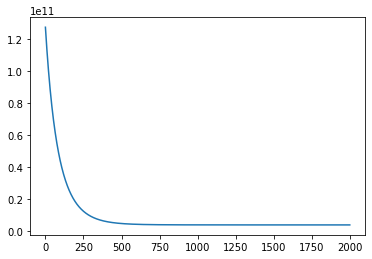

In [32]:
plt.plot(cost_history)

In [33]:
newB

array([463375.07543146,  67594.80757274, -65585.62599778, -33646.37924135])

In [36]:
beta1=newB[0]
beta2=newB[1]
beta3=newB[2]
beta4=newB[3]
def predict(x):
    return alpha +beta1*x[0]+beta2*x[1]+beta3*x[2]+beta4*x[3]

In [40]:
y_pred=[]
for a in X_test:
    y_pred.append(predict(a))

In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [43]:
print('r2_score',r2_score(y_pred, y_test))
print('MSE',mean_squared_error(y_pred, y_test))

r2_score -0.5524759026456769
MSE 8628153114.750502


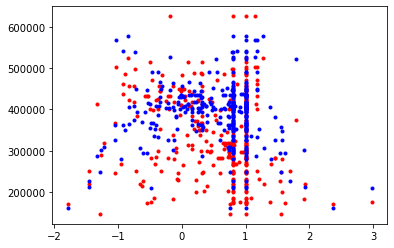

In [46]:
# Plot the data points
plt.plot(X_test, y_test, 'r.',label='Actual')
# Plot the MAP estimate
plt.plot(X_test, y_pred, 'b.',label='Predicted')

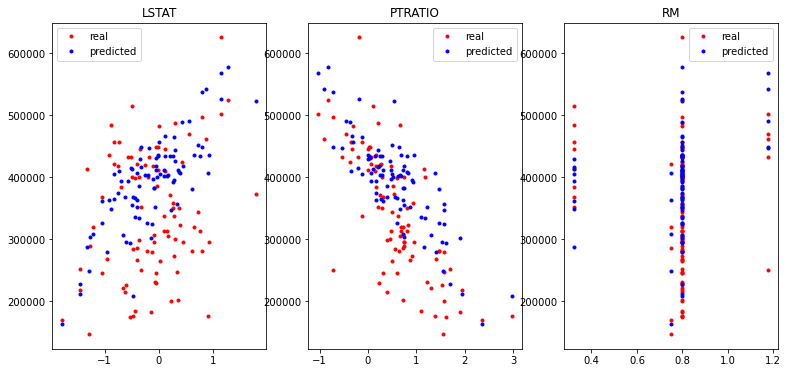

<Figure size 432x288 with 0 Axes>

In [52]:
fig = plt.figure(figsize=(13,6))

plt.subplot(1, 3, 1)
plt.title('LSTAT')
plt.plot(X_test[:,1:2],y_test,'r.',label='real')
plt.plot(X_test[:,1:2],y_pred,'b.',label='predicted')
plt.legend()

plt.subplot(1, 3, 2)
plt.title('PTRATIO')
plt.plot(X_test[:,2:3], y_test, 'r.',label='real')
plt.plot(X_test[:,2:3],y_pred,'b.',label='predicted')
plt.legend()

plt.subplot(1, 3, 3)
plt.title('RM')
plt.plot(X_test[:,3:4],y_test,'r.',label='real')
plt.plot(X_test[:,3:4],y_pred ,'b.',label='predicted')
plt.legend()

plt.show()
plt.tight_layout()